## Crow Search Algorithm

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import pandas as pd  
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score 
from sklearn.utils import resample  
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from math import * 
import math 
import random 
import os 
%matplotlib inline
sns.set_style('darkgrid')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import random
import math
import time
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from scipy import spatial
from scipy.spatial.distance import cosine
from sklearn import svm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
df = df.drop(['id'],axis=1)

# df.columns = ['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']


# df['diagnosis'][df['diagnosis'] == 'M'] = 0
# df['diagnosis'][df['diagnosis'] == 'B'] = 1

scale = StandardScaler()

x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
x=scale.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

# Adaboost

In [196]:
data = pd.read_csv("breast-cancer.csv")

data_columns1 = data.drop(['id'],axis=1)

data_columns = data_columns1.drop(['diagnosis'],axis=1)


label = data['diagnosis'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = AdaBoostClassifier(n_estimators=1)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

ada_acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for AdaBoost: ",ada_acc)



Accuracy for AdaBoost:  87.71929824561403


In [28]:
#CSA
def fitness(variables_values = []):
    classifier= AdaBoostClassifier(n_estimators=math.ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    return accuracy
def initial_population(population_size = 30, min_values = [5,1], max_values = [120,3], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [5,1], max_values = [120,3], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 50, ap = 0.02, fL = 2, min_values = [5,1], max_values = [120,3], iterations = 100, target_function = fitness):
    rem=[]
    
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [29]:
resultat_Adaboost=crow_search_algorithm()
resultat_Adaboost

(array([25.92546435,  3.        , 97.36842105]),
 [array([45.95858882,  1.3123752 , 91.22807018]),
  array([25.92546435,  3.        , 97.36842105]),
  array([51.80663544,  2.71497576, 97.36842105]),
  array([32.98606563,  2.07280311, 97.36842105]),
  array([112.35114395,   1.83732948,  91.22807018]),
  array([16.45639929,  1.29825423, 91.22807018]),
  array([88.6950086 ,  2.18992684, 97.36842105]),
  array([120.        ,   2.65651645,  97.36842105]),
  array([53.96781175,  2.0810763 , 97.36842105]),
  array([120.        ,   2.30587066,  97.36842105]),
  array([ 5.        ,  2.86007955, 97.36842105]),
  array([57.87910768,  2.18932864, 97.36842105]),
  array([ 5.        ,  2.02826318, 97.36842105]),
  array([99.65708248,  1.        , 89.47368421]),
  array([120.        ,   1.75745015,  91.22807018]),
  array([120.        ,   2.2355609 ,  97.36842105]),
  array([107.10499565,   1.56253491,  91.22807018]),
  array([103.67805902,   2.05623957,  97.36842105]),
  array([78.53699156,  2.50741

In [136]:
resultat_Adaboost[0]#best position

array([25.92546435,  3.        , 97.36842105])

In [137]:
accuracy_Adaboost_withCSA=resultat_Adaboost[0][2]
accuracy_Adaboost_withCSA

97.36842105263158

# RandomForest

In [150]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=5,n_estimators =3)
classifier.fit(x_train, y_train)
y_pred_RF_sans = classifier.predict(x_test)
accuracy_RF_without = accuracy_score(y_test,y_pred_RF_sans)*100
print("accuracy=",accuracy_RF_without)


accuracy= 92.98245614035088


In [52]:
#csa
def fitness(variables_values = [3,8]):
    classifier = RandomForestClassifier(max_depth=math.ceil(variables_values[0]),n_estimators =math.ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred_RF_avec= classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred_RF_avec)*100
    return accuracy
def initial_population(population_size = 5, min_values = [2,2], max_values = [100,10], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [2,2], max_values = [100,10], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 50, ap = 0.02, fL = 2, min_values = [2,2], max_values = [100,10], iterations = 100, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [53]:
resultat_RF=crow_search_algorithm()
resultat_RF

(array([ 43.15781141,   3.        , 100.        ]),
 [array([43.19696058,  6.84875515, 96.49122807]),
  array([92.02602963,  8.4153176 , 96.49122807]),
  array([49.63314022,  9.63077612, 96.49122807]),
  array([90.49960914,  5.54803421, 96.49122807]),
  array([30.64906145,  8.67538615, 97.36842105]),
  array([80.19396164,  7.27550918, 96.49122807]),
  array([90.02740926,  2.60081365, 96.49122807]),
  array([50.80469949,  5.3671806 , 95.61403509]),
  array([100.        ,   2.        ,  93.85964912]),
  array([ 2.        ,  5.30371482, 95.61403509]),
  array([52.07356916, 10.        , 95.61403509]),
  array([30.5693936 ,  5.7552868 , 94.73684211]),
  array([100.        ,   2.        ,  92.10526316]),
  array([38.82754575,  8.14616475, 96.49122807]),
  array([39.80408348,  8.59697296, 96.49122807]),
  array([54.58131233,  4.19295168, 94.73684211]),
  array([52.86125406, 10.        , 96.49122807]),
  array([85.09384607,  2.19718819, 97.36842105]),
  array([59.16853637,  6.31943439, 96.4912

In [54]:
#best position
resultat_RF[0]

array([ 43.15781141,   3.        , 100.        ])

In [55]:
accuracy_RF_withCSA=resultat_RF[0][2]
accuracy_RF_withCSA

100.0

# Bagging

In [104]:
data = pd.read_csv("breast-cancer.csv")

data_columns1 = data.drop(['id'],axis=1)

data_columns = data_columns1.drop(['diagnosis'],axis=1)


label = data['diagnosis'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = BaggingClassifier(n_estimators=3)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Bagging: ",acc)



Accuracy for Bagging:  93.85964912280701
Precision value for Bagging:  0.9285714285714286
Recall value for Bagging:  0.9069767441860465
F1 score for Bagging:  0.9176470588235294


In [76]:
#CSA
def fitness(variables_values = []):
    classifier= BaggingClassifier(n_estimators=math.ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    return accuracy
def initial_population(population_size = 30, min_values = [5,1], max_values = [120,3], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [5,1], max_values = [120,3], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 50, ap = 0.02, fL = 2, min_values = [5,1], max_values = [120,3], iterations = 100, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [77]:
resultat_Bagg=crow_search_algorithm()
resultat_Bagg

(array([84.76708279,  2.        , 99.12280702]),
 [array([87.26288842,  1.7611067 , 92.98245614]),
  array([44.83244274,  1.59602166, 95.61403509]),
  array([60.98207908,  1.57240045, 95.61403509]),
  array([91.73486981,  2.19842409, 95.61403509]),
  array([ 5.        ,  1.96825249, 94.73684211]),
  array([120.        ,   2.25423665,  95.61403509]),
  array([77.46130005,  1.38832975, 95.61403509]),
  array([ 5.        ,  2.31792398, 93.85964912]),
  array([103.84016604,   2.01354784,  95.61403509]),
  array([50.33548475,  2.22352236, 94.73684211]),
  array([96.45621543,  1.21571152, 95.61403509]),
  array([77.74697674,  2.26831896, 95.61403509]),
  array([120.        ,   1.        ,  94.73684211]),
  array([77.44605345,  1.82561948, 93.85964912]),
  array([63.45483709,  2.48005003, 94.73684211]),
  array([95.79548751,  1.        , 94.73684211]),
  array([78.88998629,  1.67498723, 93.85964912]),
  array([78.60539416,  2.10182065, 93.85964912]),
  array([77.11690283,  2.09485127, 95.6140

In [78]:
resultat_Bagg[0]

array([84.76708279,  2.        , 99.12280702])

In [79]:
accuracy_Bagg_withCSA=resultat_Bagg[0][2]
accuracy_Bagg_withCSA

99.12280701754386

# Gradient boosting

In [314]:
data = pd.read_csv("breast-cancer.csv")

data_columns1 = data.drop(['id'],axis=1)

data_columns = data_columns1.drop(['diagnosis'],axis=1)


label = data['diagnosis'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)

clf = GradientBoostingClassifier(n_estimators=2)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

graacc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Gradient Boosting: ",graacc)


Accuracy for Gradient Boosting:  62.28070175438597


In [121]:
#csa
def fitness(variables_values = []):
    classifier = GradientBoostingClassifier(n_estimators =math.ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred_RF_avec= classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred_RF_avec)*100
    return accuracy
def initial_population(population_size = 5, min_values = [2,2], max_values = [100,10], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [2,2], max_values = [100,10], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 50, ap = 0.02, fL = 2, min_values = [2,2], max_values = [100,10], iterations = 100, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [122]:
resultat_Gra=crow_search_algorithm()
resultat_Gra

(array([20.04619257,  7.        , 96.49122807]),
 [array([20.04619257,  7.        , 96.49122807]),
  array([54.18637999,  6.3522547 , 96.49122807]),
  array([35.29793128,  8.36720621, 95.61403509]),
  array([46.05760166,  6.71596636, 96.49122807]),
  array([ 2.        , 10.        , 95.61403509]),
  array([67.11727532,  4.4799913 , 95.61403509]),
  array([15.48832686, 10.        , 95.61403509]),
  array([27.71555345,  8.58918849, 95.61403509]),
  array([83.98612776,  2.58191622, 93.85964912]),
  array([100.        ,   3.59410561,  93.85964912]),
  array([63.02287263,  4.17700544, 95.61403509]),
  array([49.60019738,  3.9936906 , 93.85964912]),
  array([50.68423668,  3.31500865, 93.85964912]),
  array([32.67011485,  5.06311274, 95.61403509]),
  array([67.7161793 ,  8.96508393, 95.61403509]),
  array([66.94224064,  8.39209671, 95.61403509]),
  array([48.30260562,  2.        , 62.28070175]),
  array([89.16114058,  7.98177391, 95.61403509]),
  array([57.63510923,  8.05471454, 95.61403509])

In [123]:
resultat_Gra[0]

array([20.04619257,  7.        , 96.49122807])

In [124]:
accuracy_Gra_withCSA=resultat_Gra[0][2]
accuracy_Gra_withCSA

96.49122807017544

# Extra trees

In [313]:
data = pd.read_csv("breast-cancer.csv")

data_columns1 = data.drop(['id'],axis=1)

data_columns = data_columns1.drop(['diagnosis'],axis=1)


label = data['diagnosis'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)

clf = ExtraTreesClassifier(n_estimators=3)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

extacc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Extra Trees: ",extacc)



Accuracy for Extra Trees:  92.10526315789474


In [132]:
#csa
def fitness(variables_values = []):
    classifier = ExtraTreesClassifier(n_estimators =math.ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred_RF_avec= classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred_RF_avec)*100
    return accuracy
def initial_population(population_size = 5, min_values = [2,2], max_values = [100,10], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [2,2], max_values = [100,10], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 50, ap = 0.02, fL = 2, min_values = [2,2], max_values = [100,10], iterations = 100, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [133]:
resultat_Ext=crow_search_algorithm()
resultat_Ext

(array([ 13.39241635,   6.        , 100.        ]),
 [array([82.41067825,  8.1851305 , 97.36842105]),
  array([ 2.        ,  4.42107724, 98.24561404]),
  array([65.54546545,  2.11307061, 98.24561404]),
  array([31.52114963,  5.37249448, 94.73684211]),
  array([15.28585725,  4.02306778, 94.73684211]),
  array([ 6.65877066,  6.01163308, 97.36842105]),
  array([91.75197969, 10.        , 97.36842105]),
  array([ 7.40557205,  5.95098529, 94.73684211]),
  array([77.57738579,  9.183909  , 97.36842105]),
  array([ 2.11837394,  6.27347721, 95.61403509]),
  array([32.36265087,  2.77171409, 92.98245614]),
  array([21.70234694,  2.        , 93.85964912]),
  array([100.        ,   9.17190596,  97.36842105]),
  array([61.30882763,  2.5759857 , 96.49122807]),
  array([18.34447206,  2.        , 92.98245614]),
  array([70.37427815,  6.13204111, 97.36842105]),
  array([27.65479745,  4.54445275, 97.36842105]),
  array([11.84190972,  2.        , 94.73684211]),
  array([86.09453874,  8.36234629, 97.3684210

In [134]:
resultat_Ext[0]

array([ 13.39241635,   6.        , 100.        ])

In [135]:
accuracy_Ext_withCSA=resultat_Ext[0][2]
accuracy_Ext_withCSA

100.0

## Evaluation 


In [315]:
y1 = [ada_acc, accuracy_RF_without, acc, graacc, extacc] 
y2 = [accuracy_Adaboost_withCSA, accuracy_RF_withCSA, accuracy_Bagg_withCSA, accuracy_Gra_withCSA, accuracy_Ext_withCSA]

<AxesSubplot:xlabel='0', ylabel='1'>

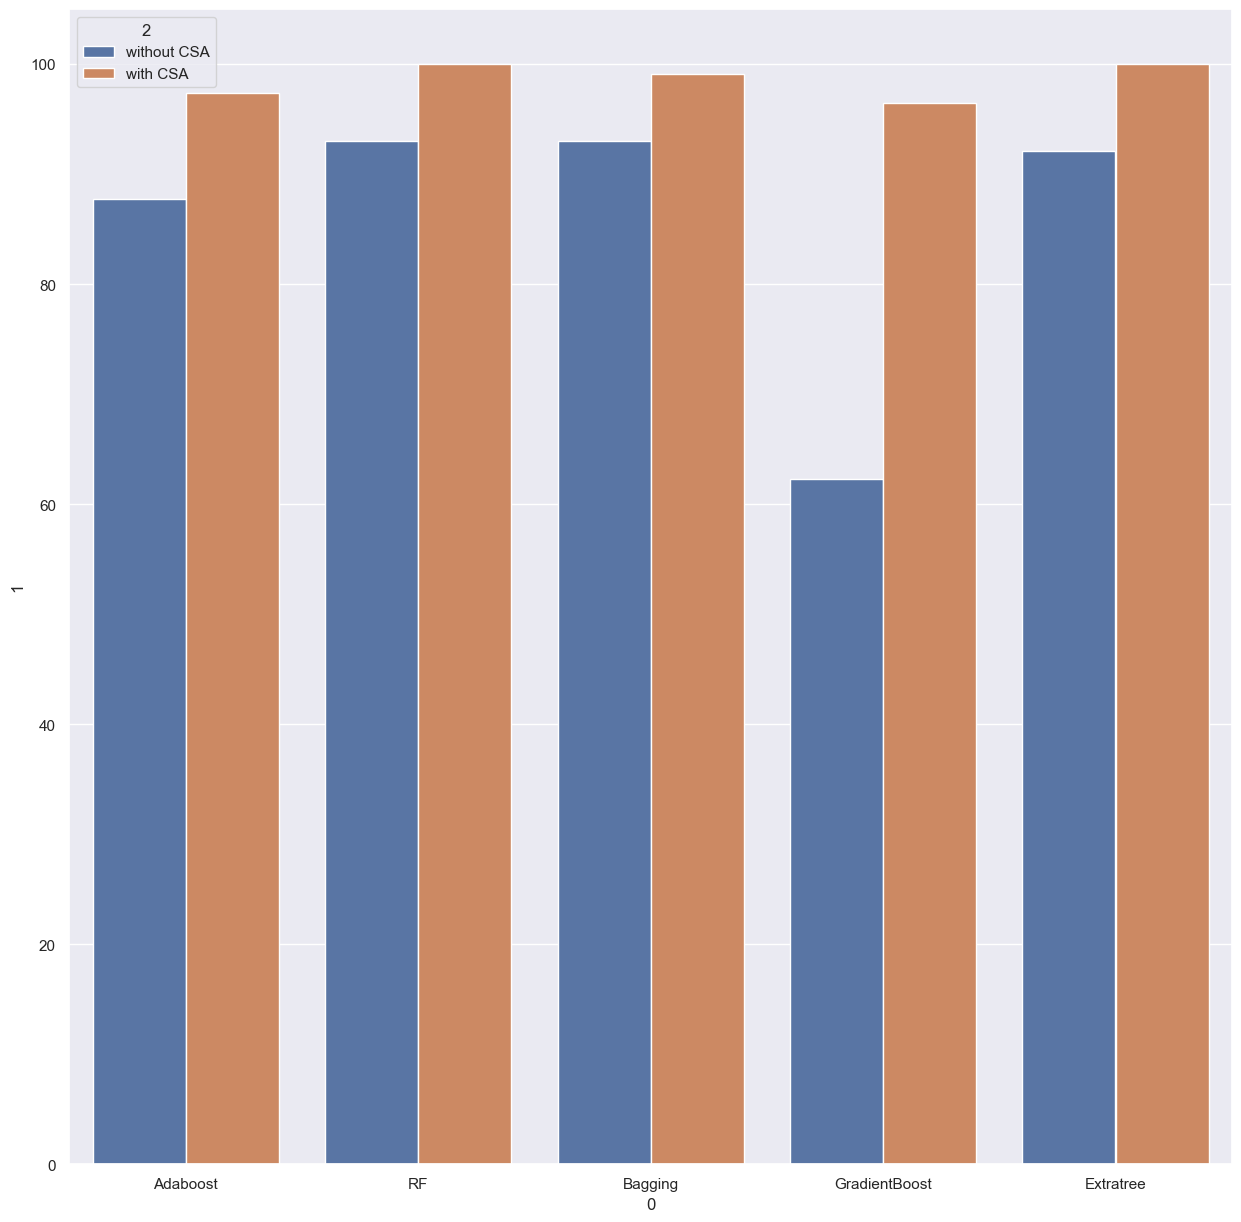

In [317]:
ds=[['Adaboost',y1[0],'without CSA'],['Adaboost',y2[0],'with CSA'],['RF',y1[1],'without CSA'],['RF',y2[1],'with CSA'],['Bagging',y1[2],'without CSA'],['Bagging',y2[2],'with CSA'],['GradientBoost',y1[3],'without CSA'],['GradientBoost',y2[3],'with CSA'],['Extratree',y1[4],'without CSA'],['Extratree',y2[4],'with CSA']]
ds=pd.DataFrame(ds)
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(data=ds, x=0, y=1, hue=2)